# Biodiversity in National Parks - Data Analysis

## 1.0 Install and Import Modules

***Installing modules***

In [1]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas

In [3]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install pyarrow

Note: you may need to restart the kernel to use updated packages.


***Import modules***

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2.0 Pre-process of Data

***Read and load .csv files***

In [6]:
species = pd.read_csv('species_info.csv')
observations = pd.read_csv('observations.csv')

***Examine observations.csv***

In [7]:
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [8]:
observations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


***Scientific name appeared in observations.csv***

In [9]:
observations.scientific_name.unique()

array(['Vicia benghalensis', 'Neovison vison', 'Prunus subcordata', ...,
       'Ranunculus hebecarpus', 'Gulo gulo', 'Dichanthelium depauperatum'],
      dtype=object)

***Number of scientific name appeared in observations.csv***

In [10]:
observations.scientific_name.nunique()

5541

***<u>Analysis</u>***

- Based on logical reasoning, one species will only have one unique scientific name meaning there are total of 5541 distinct species appeared in the file.

***Park name appeared in observations.csv***

In [11]:
observations.park_name.unique()

array(['Great Smoky Mountains National Park', 'Yosemite National Park',
       'Bryce National Park', 'Yellowstone National Park'], dtype=object)

***Number of park name appeared in observations.csv***

In [12]:
observations.park_name.nunique()

4

***Number of null items in observations.csv***

In [13]:
observations.isnull().sum()

scientific_name    0
park_name          0
observations       0
dtype: int64

***<u>Analysis</u>***

- Assuming that all of unique parks have each species, we should have 5541*4= 22164 species recorded in the file. 
- Additionally, there are no empty values in the system hence there are duplicated items recorded in the observations.csv

-----------------------------------------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------------

***Examine species_info.csv***

In [14]:
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


***Matrix size of species_info.csv***

In [15]:
species.shape

(5824, 4)

**Values recorded as row and column**

In [16]:
species.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


***<u>Analysis:</u>***
- There are 2 names recorded for each species, 'common names' and 'scientific name'.
- 'Common names' is the general name known by the public which can be represent the same species but different breed.
- 'Scientific name' is the special name which is the other way round for 'common names'.

***Conservation status of species***

In [17]:
species.conservation_status.unique()

array([nan, 'Species of Concern', 'Endangered', 'Threatened',
       'In Recovery'], dtype=object)

**Sum of conservation status of species**

In [18]:
species.conservation_status.nunique()

4

**Percentage of conservation status with null value**

In [19]:
count = species.conservation_status.shape[0]
null_pct = (1-species.conservation_status.count()/count) * 100
round(null_pct, 2)

96.72

***Categories of species***

In [20]:
species.category.unique()

array(['Mammal', 'Bird', 'Reptile', 'Amphibian', 'Fish', 'Vascular Plant',
       'Nonvascular Plant'], dtype=object)

***Sum of species' categories***

In [21]:
species.category.nunique()

7

***<u>Analysis:</u>***
- This file (species_info.csv) contains total of 5824 rows with 4 columns.
- This file contains 5824 different species each with 4 distinctive information (category, scientific name, common names, conservatios status).
- There are around 96.72% of conservation status recorded as null value.
    - It is more likely null value is recorded when the conservation status of the species is 'safe'.
    - Hence, we should replace the null value with some terms that indicates the conservation status is 'safe'.
- There are no empty values recorded in categories of species.

**Sum of scientific name appeared in species_info.csv**

In [22]:
species.scientific_name.nunique()

5541

**Sum of common names appeared in species_info.csv**

In [23]:
species.common_names.nunique()

5504

**<u>Analysis:</u>**

- The value of the sum of 'scientific name' and 'common name' is not matching.
- This indicates that 'common name' is not suitable to be analysis because it doesn't resembles the same amount of species indicated by 'scientific name'.

## 3.0 Data Cleaning

**Checking duplicated records in observations.csv**

In [24]:
observations[observations.duplicated(subset=['scientific_name', 'park_name'])]

,scientific_name,park_name,observations
483,Agrostis gigantea,Yellowstone National Park,235
490,Agrostis mertensii,Yosemite National Park,128
945,Rumex crispus,Yellowstone National Park,255
1213,Dianthus barbatus,Bryce National Park,110
1259,Riparia riparia,Bryce National Park,91
...,...,...,...
23258,Microtus longicaudus,Yellowstone National Park,244
23259,Agrostis scabra,Bryce National Park,118
23267,Oxalis corniculata,Yosemite National Park,164
23273,Dactylis glomerata,Bryce National Park,89


In [25]:
# adds a new column 'total', which stores the sum of observations of group 'scientific_name' and park_name'
# 'total' is used to keep track of the updated number of observations more accurately
observations['total'] = observations.groupby(['scientific_name', 'park_name'])['observations'].transform('sum')

#when encounter a duplicated 'scientific_name' or 'park_name', it will keep the last occurence and drop the first encountered from the list
observations.drop_duplicates(subset=['scientific_name', 'park_name'], keep='last', inplace=True)

#selects and rearrange in the specific order below
observations = observations[['scientific_name', 'park_name', 'total']]

#renamed the column 'total' as 'observations'
observations = observations.rename(columns={'total': 'observations'})

#display the latest information of observations.csv to check whether did the duplicated items are removed
observations.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22164 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  22164 non-null  object
 1   park_name        22164 non-null  object
 2   observations     22164 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 692.6+ KB


**<u>Analysis</u>**
- The initial sum of records in observations.csv is 23296 while the current sum of records shows 22164.
- This indicates that the duplicated records in observations.csv have successfully been removed.

---

**Replacing null values of conservation status in species_info.csv**

Since there are 96.72% of the data recorded as null value, we will then assume the null value as the least concern species.

In [146]:
species.conservation_status = species["conservation_status"].fillna('Least-Concern')

In [147]:
species.conservation_status.unique()

array(['Least-concern', 'Species of Concern', 'Endangered', 'Threatened',
       'In Recovery'], dtype=object)

***<u>Analysis:</u>***
- The null value has been successfully been replaced as "Least-concern"

**Checking duplicated item inspecies_info.csv**

In [28]:
duplicates = species.scientific_name[species.duplicated(subset=['scientific_name']) == True]

In [29]:
duplicates.shape

(283,)

In [30]:
duplicates

3017                      Cervus elaphus
3019              Odocoileus virginianus
3020                         Canis lupus
3022                       Puma concolor
3025                    Lutra canadensis
                      ...               
5619    Panicum rigidulum var. rigidulum
5638                      Setaria pumila
5640                    Vulpia bromoides
5643                       Vulpia myuros
5750                     Rosa eglanteria
Name: scientific_name, Length: 283, dtype: object

***<u>Analysis:</u>***
- There are total of 283 duplicated species recorded in species_info.csv.

**3.4 Keeping only the last duplicated item in species_info.csv**

In [31]:
species.drop_duplicates(subset=['scientific_name'], keep='last', inplace=True)

In [32]:
species.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5541 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5541 non-null   object
 1   scientific_name      5541 non-null   object
 2   common_names         5541 non-null   object
 3   conservation_status  5541 non-null   object
dtypes: object(4)
memory usage: 216.4+ KB


In [33]:
observations.scientific_name.nunique()

5541

In [34]:
species.shape

(5541, 4)

***<u>Analysis:</u>***
- The sum of species in species_info.csv matches with the sum of species appeared in observations.csv
- This indicates that duplicated items have been successfully removed in species_info.csv

## 4.0 Combining observations.csv and species_info.csv into one dataframe

In [36]:
df = observations.copy()

In [37]:
df = pd.merge(df, species, on="scientific_name")

In [38]:
df

,scientific_name,park_name,observations,category,common_names,conservation_status
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",Least-concern
1,Neovison vison,Great Smoky Mountains National Park,77,Mammal,American Mink,Least-concern
2,Prunus subcordata,Yosemite National Park,138,Vascular Plant,Klamath Plum,Least-concern
3,Abutilon theophrasti,Bryce National Park,84,Vascular Plant,Velvetleaf,Least-concern
4,Githopsis specularioides,Great Smoky Mountains National Park,85,Vascular Plant,Common Bluecup,Least-concern
...,...,...,...,...,...,...
22159,Croton monanthogynus,Yosemite National Park,173,Vascular Plant,Prairie Tea,Least-concern
22160,Otospermophilus beecheyi,Bryce National Park,130,Mammal,California Ground Squirrel,Least-concern
22161,Heterotheca sessiliflora ssp. echioides,Bryce National Park,140,Vascular Plant,Sessileflower False Goldenaster,Least-concern
22162,Dicranella rufescens,Yosemite National Park,171,Nonvascular Plant,Dicranella Moss,Least-concern


In [57]:
df.park_name.value_counts()

park_name
Great Smoky Mountains National Park    5541
Yosemite National Park                 5541
Bryce National Park                    5541
Yellowstone National Park              5541
Name: count, dtype: int64

In [56]:
df.category.value_counts()

category
Vascular Plant       17048
Bird                  1952
Nonvascular Plant     1332
Mammal                 704
Fish                   500
Amphibian              316
Reptile                312
Name: count, dtype: int64

In [58]:
df.conservation_status.value_counts()

conservation_status
Least-concern         21448
Species of Concern      604
Endangered               60
Threatened               40
In Recovery              12
Name: count, dtype: int64

**<u>Analysis</u>**
- The purpose of combining two data frames (species_info.csv and observations.csv) into one dataframe is to facilitate the process of visualising data analysis such as plotting a graph, drawing a chart.

## 5.0 Visualising data analysis

**Graph of Distribution by Category**

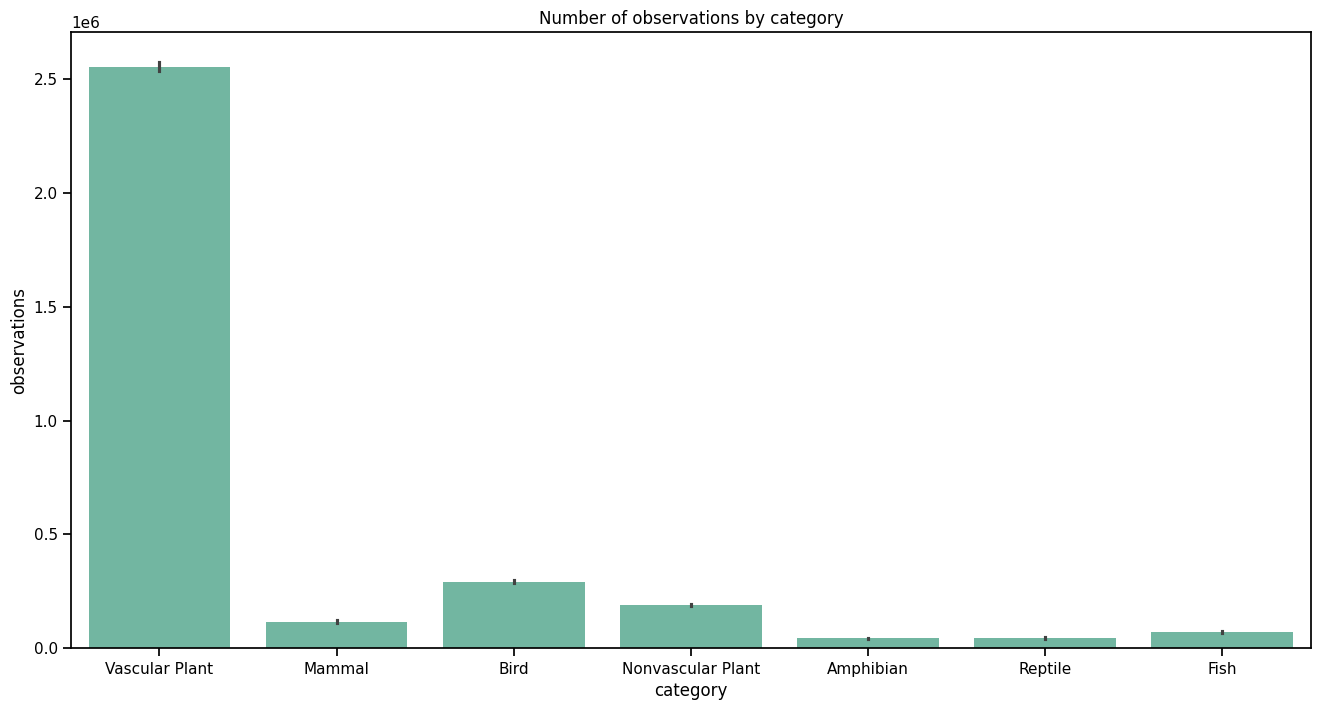

In [91]:
fig = plt.figure(figsize=(16, 8))
sns.barplot(x='category', y='observations', data=df, estimator=np.sum)
plt.title('Number of observations by category')
plt.show()

**<u>Analysis</u>**
- Vascular plant is the most frequent category observed.
- Bird is the second most frequent category observed.
- Amphibian and reptile are the least frequent category observed.

**Graph of Number of Observations for Each Categories by Park**

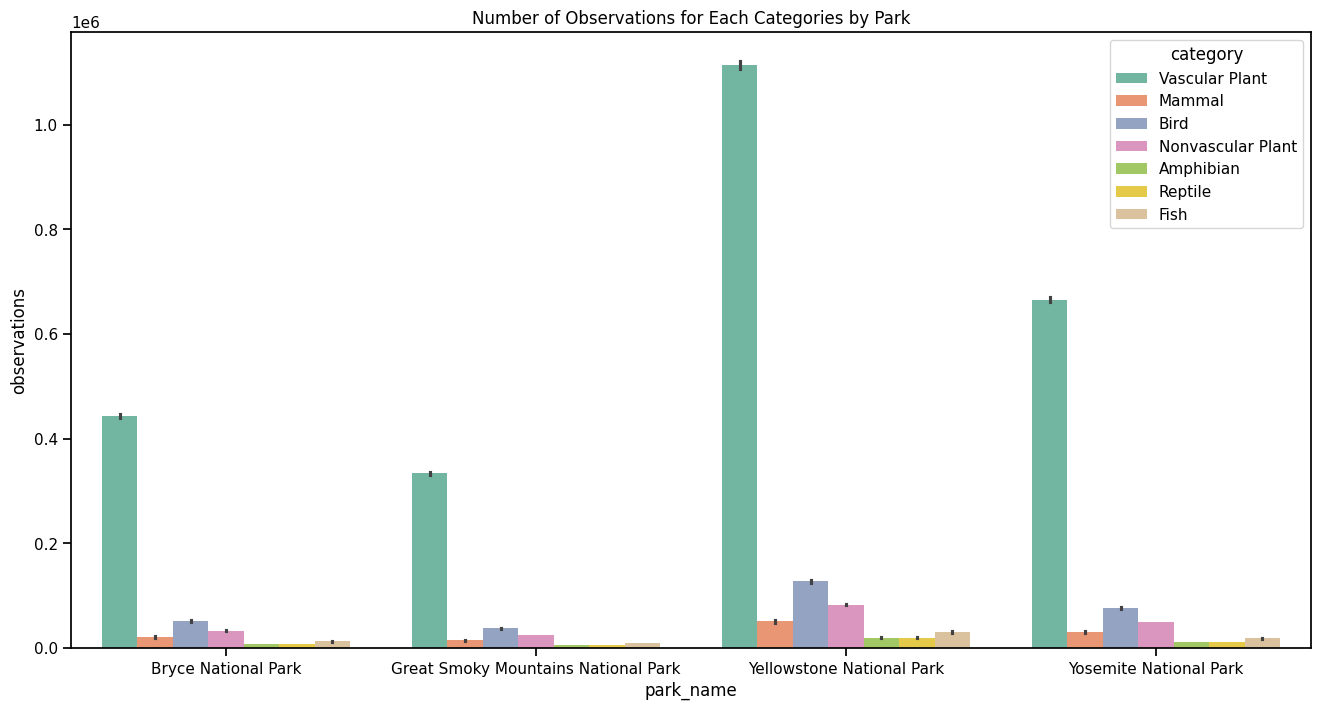

In [104]:
order = ['Bryce National Park', 'Great Smoky Mountains National Park', 'Yellowstone National Park', 'Yosemite National Park']
sns.set_palette('Set2')
sns.set_context('notebook')
fig = plt.figure(figsize=(16, 8))
sns.barplot(x='park_name', y='observations', data=df, hue='category', estimator=np.sum, order=order)
plt.title('Number of Observations for Each Categories by Park')
plt.show()

**<u>Analysis</u>**
- Yellowstone National Park has the most numbers of observations for each categories by park
- The most numbered species observed in each four parks are vascular plant.
- The least numbered species observed in each four parks are amphibian and reptile

***Graph of Distribution of Categories by Conservation Status***

Text(0.5, 1.0, 'Distribution of categories by conservation status')

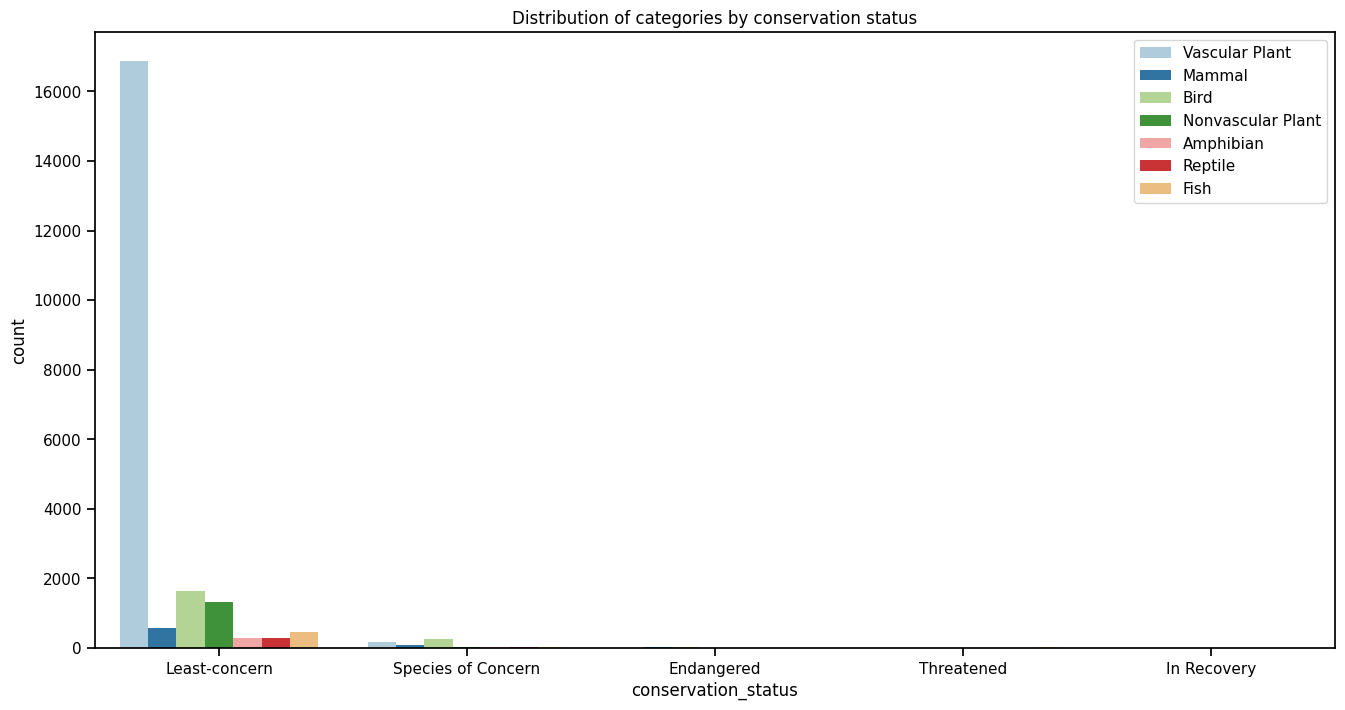

In [163]:
fig = plt.figure(figsize=(16, 8))
sns.countplot(x='conservation_status', data=df,hue='category')
plt.legend(loc='upper right')
plt.title('Distribution of categories by conservation status')

***<u>Analysis</u>***
- The distribution of conservation status are fairly satisfied because most of the species are in the 'Least-concern' category while only little of the species are in 'species of concern' category.
- There are none species that are in the 'endangered', 'threatened' and 'in recovery' conservation status.
- species of concern included vascular plant, mammal and bird.

**Graph of Distribution of Endangered and Least-Concern Groups for Each Category**

In [151]:
categories = ["Mammal", "Bird", "Amphibian", "Reptile", "Fish", "Vascular Plant", "Nonvascular Plant"]

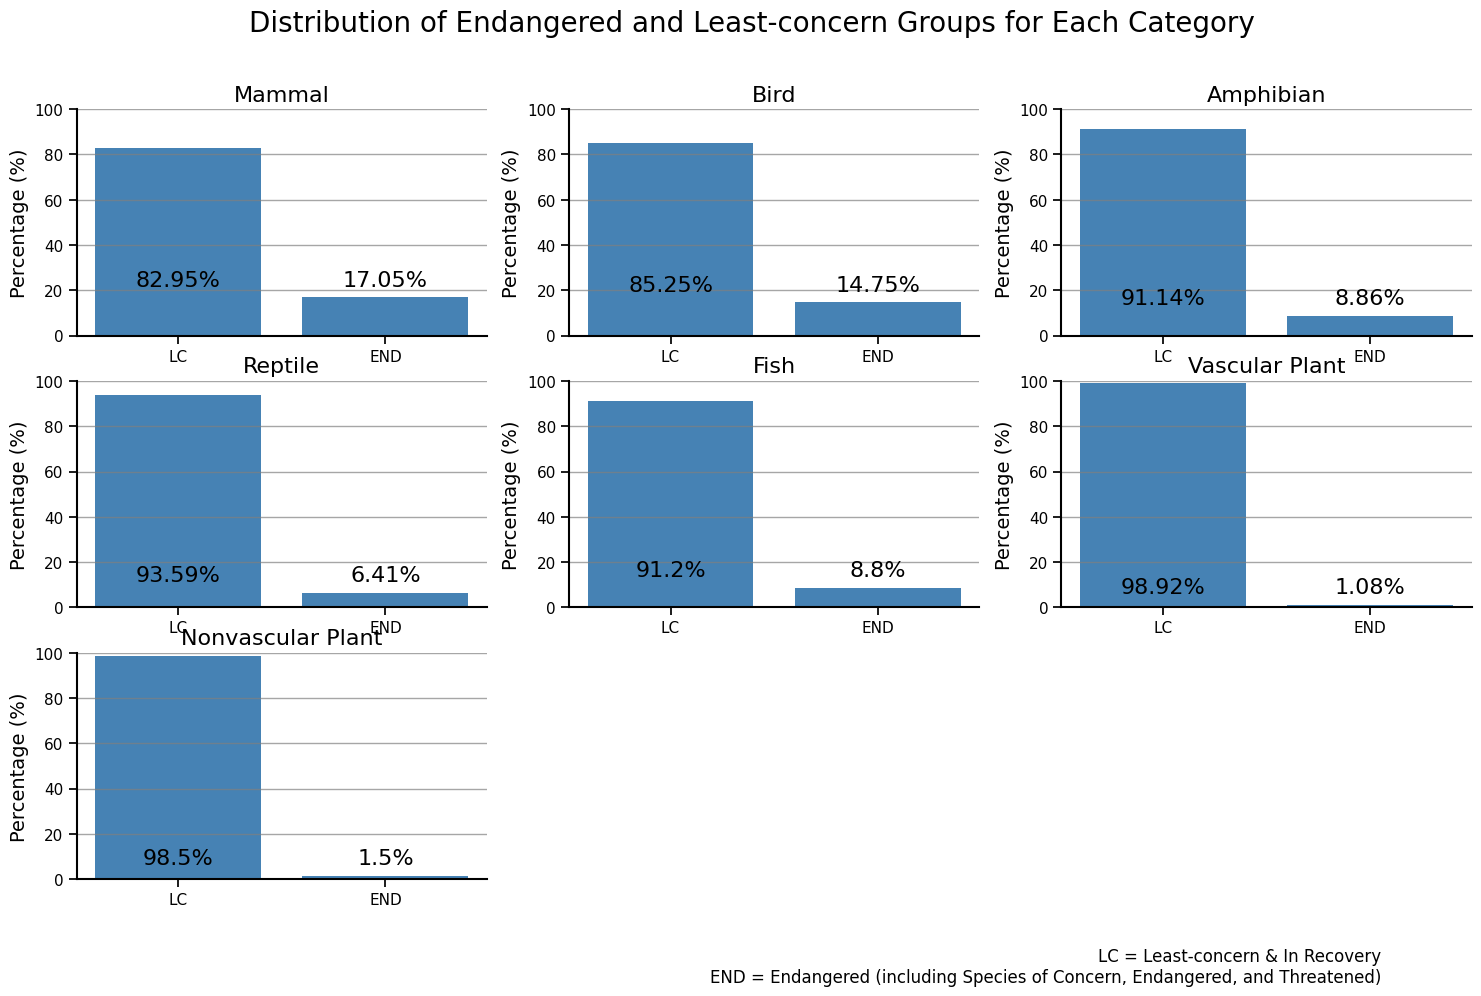

In [94]:
## Plot yearly precentage change in GDP for individual countries
nrow = 3
ncol = 3
fig, axes = plt.subplots(nrow, ncol, figsize=(18, 10))
plt.rcParams['font.size'] = 12
fig.suptitle(f"Distribution of Endangered and Least-concern Groups for Each Category",
              fontsize = 20)

for index, cat in enumerate(categories):
    ## Create a temporary dataframe and do necessary calculations
    temp_df = species[species.category == cat]
    
    total_count = temp_df.shape[0]
    least_count = temp_df.category[temp_df.conservation_status == "Least-concern"].count()
    least_count = least_count + temp_df.category[temp_df.conservation_status == "In Recovery"].count()
    end_count = total_count - least_count
    
    least_pct = least_count / total_count * 100
    end_pct = end_count / total_count * 100

    ## Plot the graph
    ax = plt.subplot(nrow, ncol, index+1)
    
    ax.bar(x = ["LC", "END"],
           height = [least_pct, end_pct],
           color = "steelblue")
    
    ax.set_ylim(0, 100)

    ax.grid(alpha = 0.7, color='gray', axis="y")
    ax.set_ylabel(f"Percentage (%)", fontsize = 14)
    plt.title(f"{cat.title()}", fontsize = 16)
        
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)
    
    sns.despine(ax=ax, offset=0)
    
    plt.annotate(f"{round(least_pct, 2)}%", 
                 xy = [0, end_pct+5], 
                 horizontalalignment = 'center',
                 color = 'black',
                 fontsize = 16)
        
    plt.annotate(f"{round(end_pct, 2)}%", 
                 xy = [1, end_pct+5], 
                 horizontalalignment = 'center',
                 color = 'black',
                 fontsize = 16)

axs1  = plt.subplot(nrow, ncol, 8)
axs2  = plt.subplot(nrow, ncol, 9)
fig.delaxes(axs1)
fig.delaxes(axs2)

txt=f"LC = Least-concern & In Recovery\nEND = Endangered (including Species of Concern, Endangered, and Threatened)"
plt.figtext(0.85, 0.01, txt, wrap=True, horizontalalignment='right', fontsize=12) 

plt.show()

**<u>Analysis</u>**
- From the above, an average of 91.65 percentage are in the 'least-concern' of conservation status while only 8.35 percentage of species are in the endangered conservation status which inlcuded 'species of concern', 'endangered', threatened' and 'in recovery'.

**Graph of Distribution of Concerned Species' Conservation Status**

In [102]:
endangered = species.copy()
endangered = endangered[endangered.conservation_status != "Least-concern"]
groups = ['Species of Concern', 'Endangered', 'Threatened', 'In Recovery']
total_count = endangered.shape[0]
counts = [endangered.conservation_status[endangered.conservation_status == group].count() for group in groups]
pct = [endangered.conservation_status[endangered.conservation_status == group].count()/total_count * 100 for group in groups]

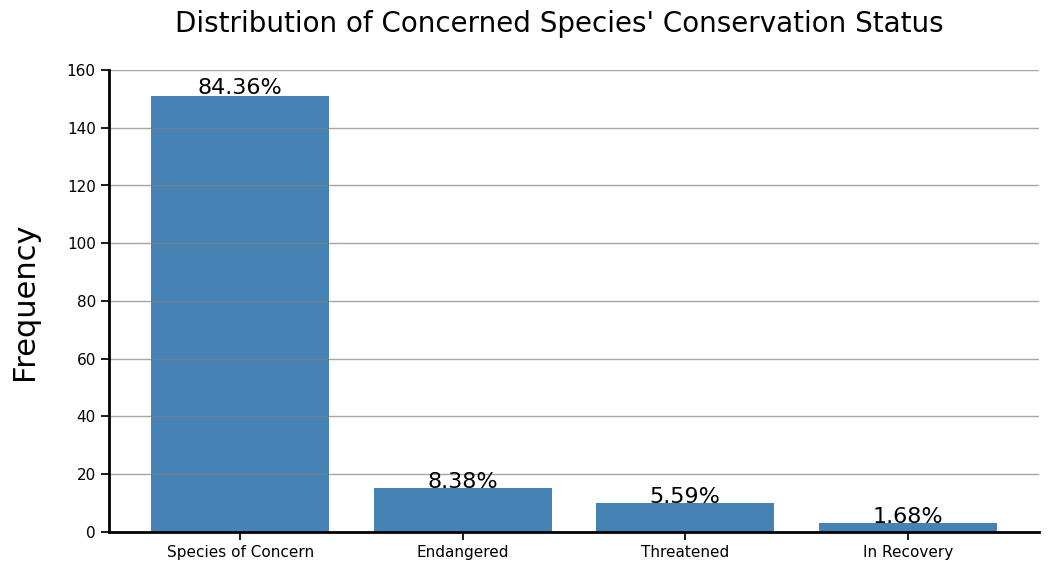

In [164]:
## Plot Conservation Status
nrow = 1
ncol = 1
fig, ax = plt.subplots(nrow, ncol, figsize=(12, 6))
plt.rcParams['font.size'] = 16
fig.suptitle(f"Distribution of Concerned Species' Conservation Status",
              fontsize = 20)

ax = plt.subplot(nrow, ncol, 1)
ax.bar(x = groups,
       height = counts,
       color="steelblue")

# ax.set_xlabel("Conservation Status", fontsize=20, labelpad=20)
ax.set_ylabel("Frequency", fontsize=22, labelpad=20)

plt.yticks(fontsize=16)
plt.xticks(fontsize = 16)

ax.grid(alpha = 0.7, color='gray', axis="y")
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)

ax.set_ylim(0, 160)

sns.despine(ax=ax, offset=0)

for i in range(len(pct)):
    plt.annotate(f"{round(pct[i], 2)}%", 
                 xy = [i, pct[i]*180/100], 
                 horizontalalignment = 'center',
                 color = 'black',
                 fontsize = 16)


plt.show()

**<u>Analysis</u>**
- The above is the closer look of the 8.35 percentage of 'concerned' conservation status.
- 'species of concern' has the greatest percentage while 'in recovery' has the least percentage.

**Graph of Distribution of Endangered Species by Category**

In [98]:
## Which category is most at risk?
endangered = endangered[endangered.conservation_status != "In Recovery"]
end_group = endangered.groupby("category").count()
end_group

end_group_pct = []
total_count = end_group.conservation_status.sum()

end_group_pct.append(round(end_group.conservation_status/total_count * 100, 2))
end_group_pct = pd.DataFrame(end_group_pct).T

end_group_pct = end_group_pct.sort_values(by=["conservation_status"], ascending=False)
end_group_pct
list(end_group_pct.index)

['Bird',
 'Vascular Plant',
 'Mammal',
 'Fish',
 'Amphibian',
 'Nonvascular Plant',
 'Reptile']

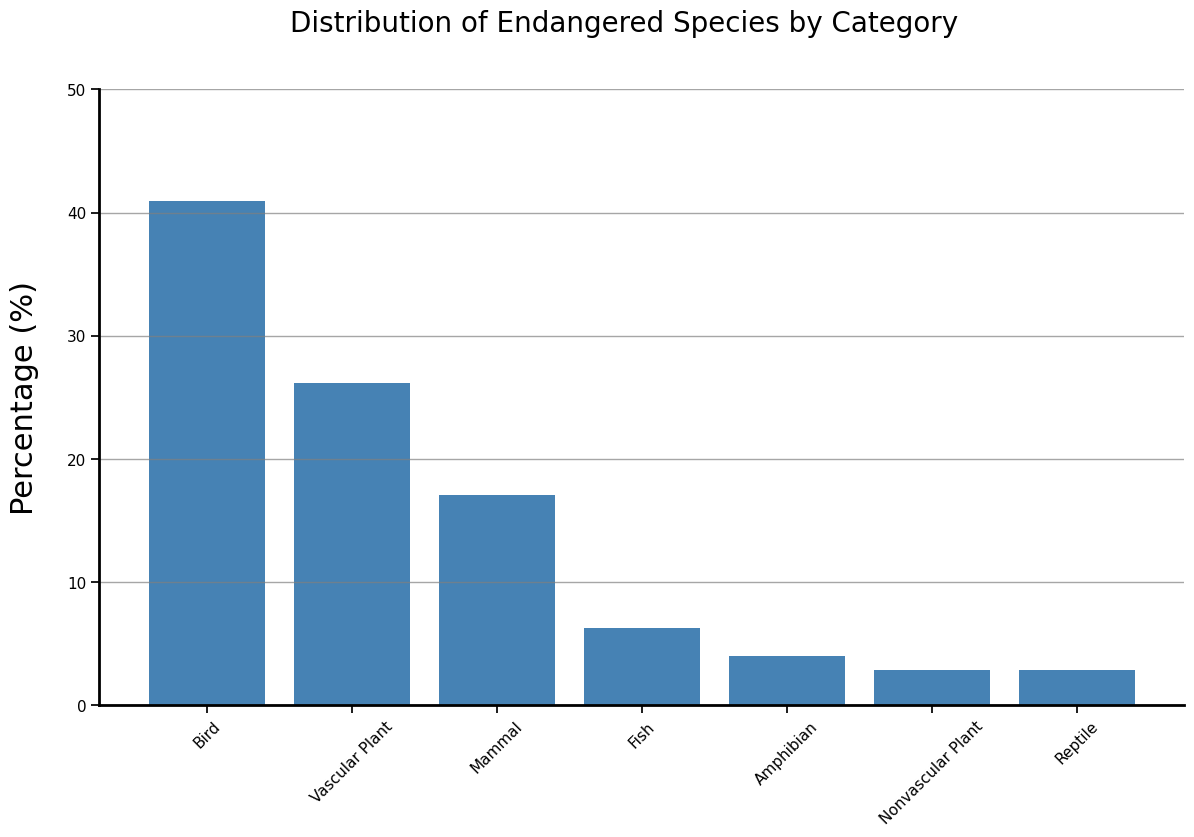

In [99]:
categories = list(end_group_pct.index)

## Plot Conservation Status
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(111)
fig.suptitle(f"Distribution of Endangered Species by Category", fontsize=20)

ax.bar(categories,  # Use 'categories' here instead of 'end_group_pct.index'
       end_group_pct.conservation_status,
       color="steelblue")

ax.set_xticks(categories)  # Set the ticks first
ax.set_xticklabels(categories, rotation=45)
ax.set_ylabel("Percentage (%)", fontsize=22, labelpad=20)

ax.grid(alpha=0.7, color='gray', axis="y")
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)

ax.set_ylim(0, 50)

sns.despine(ax=ax)

plt.show()


**<u>Analysis</u>**
- From the above, most of the endangered species are bird, vascular plant and mammal.
- In the other hand, nonvascular plant and reptile holds the least percentage among the endangered species.

**Graph of Distribution of Species Categories for Each Conservation Status**

In [124]:
cat_pct = {}
categories = endangered.category.unique()

for group in groups:
    group_count = endangered.conservation_status[endangered.conservation_status == group].count()
    cat_pct[group] = {}
    
    for cat in categories:
        cat_count = endangered.category[(endangered.conservation_status == group) &
                                        (endangered.category == cat)].count()
        cat_pct[group][cat] = round(cat_count/group_count * 100, 2)
cat_pct = pd.DataFrame(cat_pct)
cat_pct = cat_pct.T
cat_pct = cat_pct.reset_index()

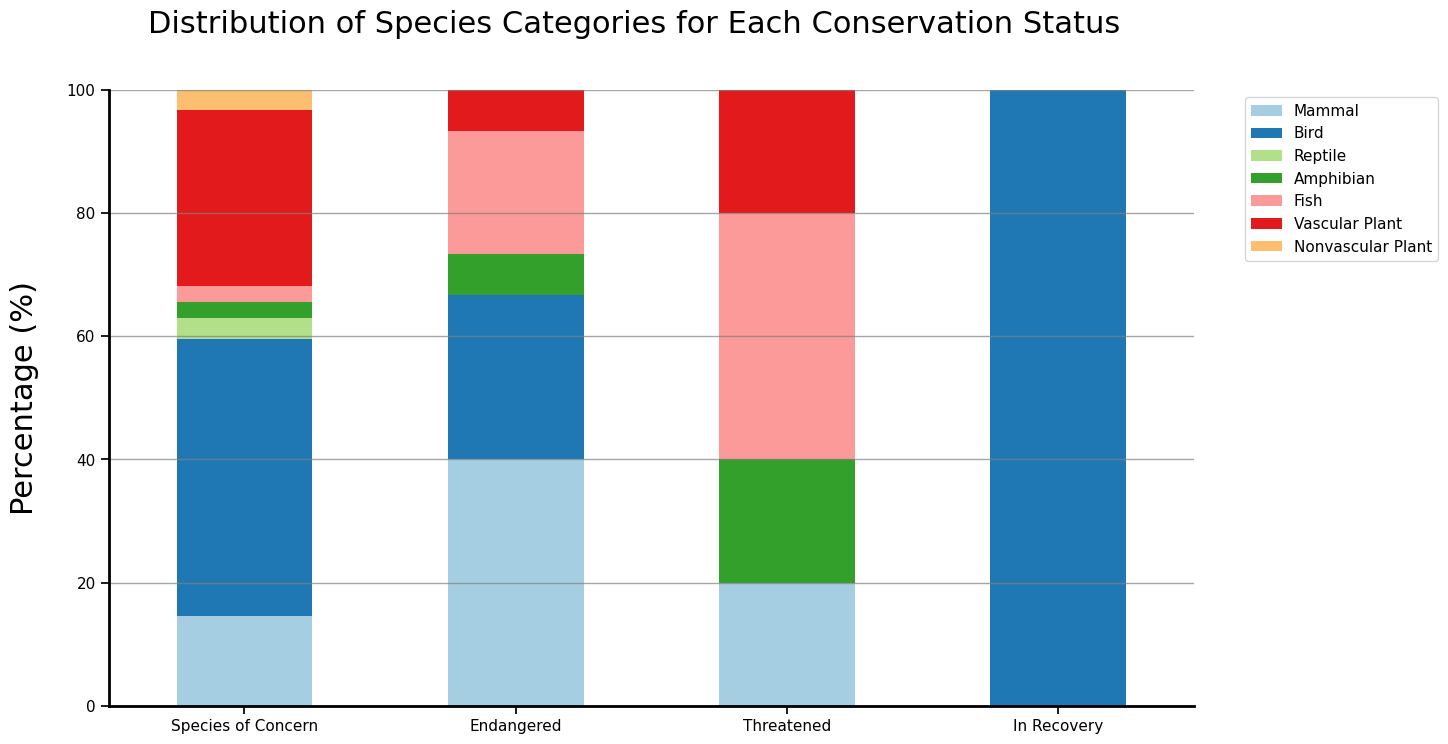

In [125]:
## plot data in stack manner of bar type
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(111)
fig.suptitle(f"Distribution of Species Categories for Each Conservation Status",
              fontsize = 22)
sns.set_palette("Paired")
ax = cat_pct.plot.bar(x="index", stacked=True,  ax=ax)

ax.set_ylabel("Percentage (%)", fontsize=22, labelpad=20)
ax.set(xlabel=None)
plt.yticks(fontsize=16)
plt.xticks(fontsize = 20)

ax.grid(alpha = 0.7, color='gray', axis="y")
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)

ax.set_ylim(0, 100)

sns.despine(ax=ax, offset=0)

plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")

plt.show()


## 6.0 Conclusion and Recommendation

In conclusion, most of the species in all of the parks are not in the 'endangered' conservation status. 
Tourists and visitors of the parks would expect to see species that can be observed in daily life. Hence, they will be able to understand these creatures and plants that they usually ignored in the corner of the cities.

However, the parks still obtained various endangered species such as mammals and birds. The conservationist of the parks should focus more on habitat preservation, community engagement, and sustainable practices to ensure their survival.